# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ipywidgets import interact, Dropdown
from IPython.display import display

df = pd.read_csv("data/JavaStringConcatenationBenchmarkingData.csv")

df['ErrorRate'] = df['Error'] / df['OPS']
df['Effective OPS'] = df['OPS'] * df['Iterations'] * df['Concatenations']

functions = np.unique(df['Function'].values)
iterations = np.unique(df['Iterations'].values)
concatenations = np.unique(df['Concatenations'].values)
jvm = np.unique(df['JVM'].values)
computer = np.unique(df['Computer'].values)
optionChoices = ['Compare Functions', 'Compare Iterations', 'Compare Concatenations']

optionsDropdown = Dropdown(options=optionChoices)
option1Dropdown = Dropdown()
option2Dropdown = Dropdown()

functionDropdown = Dropdown(options=functions, description='Wow')
iterationDropdown = Dropdown(options=iterations)
concatenationDropdown = Dropdown(options=concatenations)

@interact(options=optionsDropdown,
          option1=option1Dropdown,
          option2=option2Dropdown)
def wow(options, option1, option2):
    #Set options
    if options == optionChoices[0]:
        option1Dropdown.options = iterations
        option1Dropdown.description = 'Iterations'
        option2Dropdown.options = concatenations
        option2Dropdown.description = 'Concat'
    elif options == optionChoices[1]:
        option1Dropdown.options = functions
        option1Dropdown.description = 'Functions'
        option2Dropdown.options = concatenations
        option2Dropdown.description = 'Concat'
    elif options == optionChoices[2]:
        option1Dropdown.options = functions
        option1Dropdown.description = 'Functions'
        option2Dropdown.options = iterations
        option2Dropdown.description = 'Iterations'

    #Set Default Values
    if options is None:
        optionsDropdown.value = optionsDropdown.options[0]
        option1Dropdown.value = option1Dropdown.options[0]
        option2Dropdown.value = option2Dropdown.options[0]
    else:
        if option1 is None:
            option1Dropdown.value = option1Dropdown.options[0]
        if option2 is None:
            option2Dropdown.value = option2Dropdown.options[0]

    #Plot Graph
    if options == optionChoices[0]:
        filtered_df = df[df['Iterations'] == option1]
        filtered_df = filtered_df[filtered_df['Concatenations'] == option2]
        plt.bar(filtered_df['Function'], filtered_df['OPS'] )
        plt.show()

    elif options == optionChoices[1]:
        filtered_df = df[df['Function'] == option1]
        filtered_df = filtered_df[filtered_df['Concatenations'] == option2]
        graph = plt.plot(filtered_df['Iterations'], filtered_df['Effective OPS'])
        graph[0].axes.set_xscale('log')
        plt.show()

    elif options == optionChoices[2]:
        filtered_df = df[df['Function'] == option1]
        filtered_df = filtered_df[filtered_df['Iterations'] == option2]
        graph = plt.plot(filtered_df['Concatenations'], filtered_df['Effective OPS'])
        graph[0].axes.set_xscale('log')
        plt.show()


interactive(children=(Dropdown(description='options', options=('Compare Functions', 'Compare Iterations', 'Com…

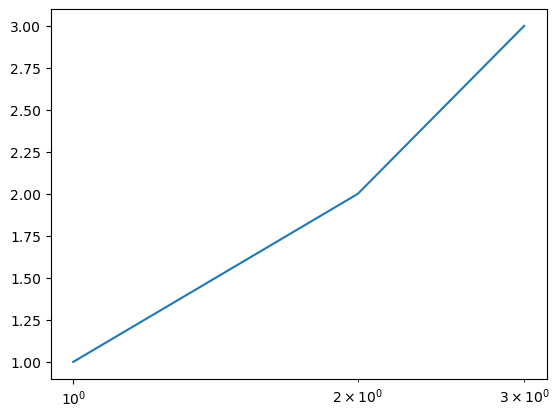

In [116]:
graph = plt.plot([1,2,3], [1,2,3])
thing = graph[0].axes
thing.set_xscale('log')
plt.show()